# Task : HR Data Analysis and Employee Status Prediction

To develop machine learning models that **predict employee status (Active vs. Inactive)** and identify the key drivers of employee attrition, engagement, and performance using structured HR and training data. The goal is to use predictive analytics to inform HR strategies for retention, performance improvement, and optimized training interventions.

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task 1: Reading and Understanding the Dataset

In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [3]:
# Load the dataset

employee = pd.read_csv('/content/drive/MyDrive/6. Machine Learning/4. Assignment - Bagging/Cleaned_HR_Data_Analysis.csv')

In [4]:
# View the dataset
employee.head()

,Employee ID,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,...,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
0,3427,20-Sep-19,Production Technician I,CCDR,Active,Contract,Zone C,Temporary,Production,Finance & Accounting,...,1,2,3,15-Jul-23,Leadership Development,Internal,Failed,2,606.11,50
1,3428,11-Feb-23,Production Technician I,EW,Active,Contract,Zone A,Part-Time,Production,Aerial,...,2,1,5,12-Sep-22,Customer Service,External,Incomplete,4,673.02,58
2,3429,10-Dec-18,Area Sales Manager,PL,Active,Full-Time,Zone B,Part-Time,Sales,General - Sga,...,1,2,1,13-Aug-22,Leadership Development,External,Failed,2,413.28,27
3,3430,21-Jun-21,Area Sales Manager,CCDR,Active,Contract,Zone A,Full-Time,Sales,Finance & Accounting,...,5,5,4,15-Dec-22,Project Management,External,Completed,3,663.78,23
4,3431,29-Jun-19,Area Sales Manager,TNS,Active,Contract,Zone A,Temporary,Sales,General - Con,...,2,5,3,13-Jul-23,Technical Skills,External,Failed,5,399.03,50


In [5]:
# Check the total rows and columns

employee.shape

(2845, 28)

In [6]:
# Check for the summary
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 2845 non-null   int64  
 1   StartDate                   2845 non-null   object 
 2   Title                       2845 non-null   object 
 3   BusinessUnit                2845 non-null   object 
 4   EmployeeStatus              2845 non-null   object 
 5   EmployeeType                2845 non-null   object 
 6   PayZone                     2845 non-null   object 
 7   EmployeeClassificationType  2845 non-null   object 
 8   DepartmentType              2845 non-null   object 
 9   Division                    2845 non-null   object 
 10  DOB                         2845 non-null   object 
 11  State                       2845 non-null   object 
 12  GenderCode                  2845 non-null   object 
 13  RaceDesc                    2845 

In [7]:
# Check for total categorical and numerical column

employee.dtypes.value_counts()

,count
object,20
int64,7
float64,1


There are 20 categorical columns and 8 numerical columns with no null values

In [8]:
# Check for Duplicate values

employee.duplicated().sum()

np.int64(0)

## Task 2: Exploratory Data Analysis

### Uni-variate Analysis

In [9]:
# Check for Target Column distribution

employee['EmployeeStatus'].value_counts()

,count
EmployeeStatus,
Active,2458
Terminated,387


In [10]:
# Check for percentage distribution of Target column for each category

round(employee.groupby('EmployeeStatus').size() * 100 / len(employee), 2)

,0
EmployeeStatus,
Active,86.4
Terminated,13.6


**Target Column** is highly **Imbalanced** as one class consist of 86%  while the other class consist of 13.6% data

**PIE CHART**

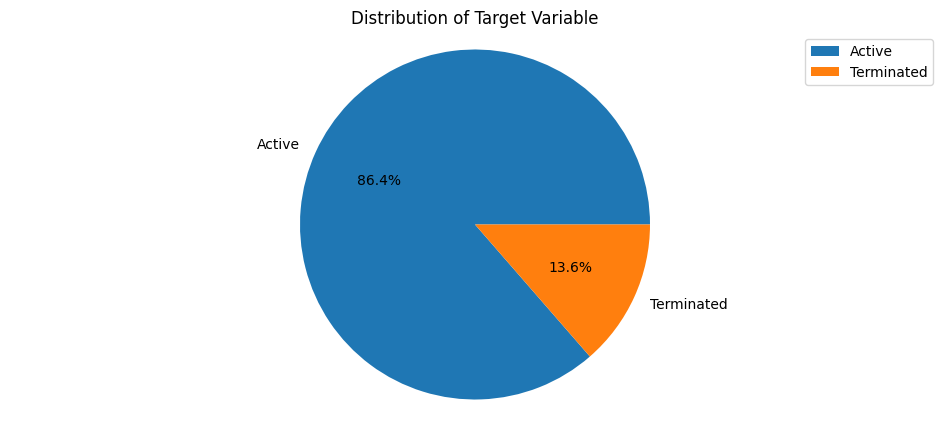

In [11]:
# Plot pie chart to show the Imbalanced data in Target Column

v = employee['EmployeeStatus'].value_counts().values

plt.figure(figsize=(12, 5))
plt.pie(v, labels = ['Active', 'Terminated'], autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Target Variable')
plt.legend()    # Add legend
plt.show()

### Bi-variate Analysis

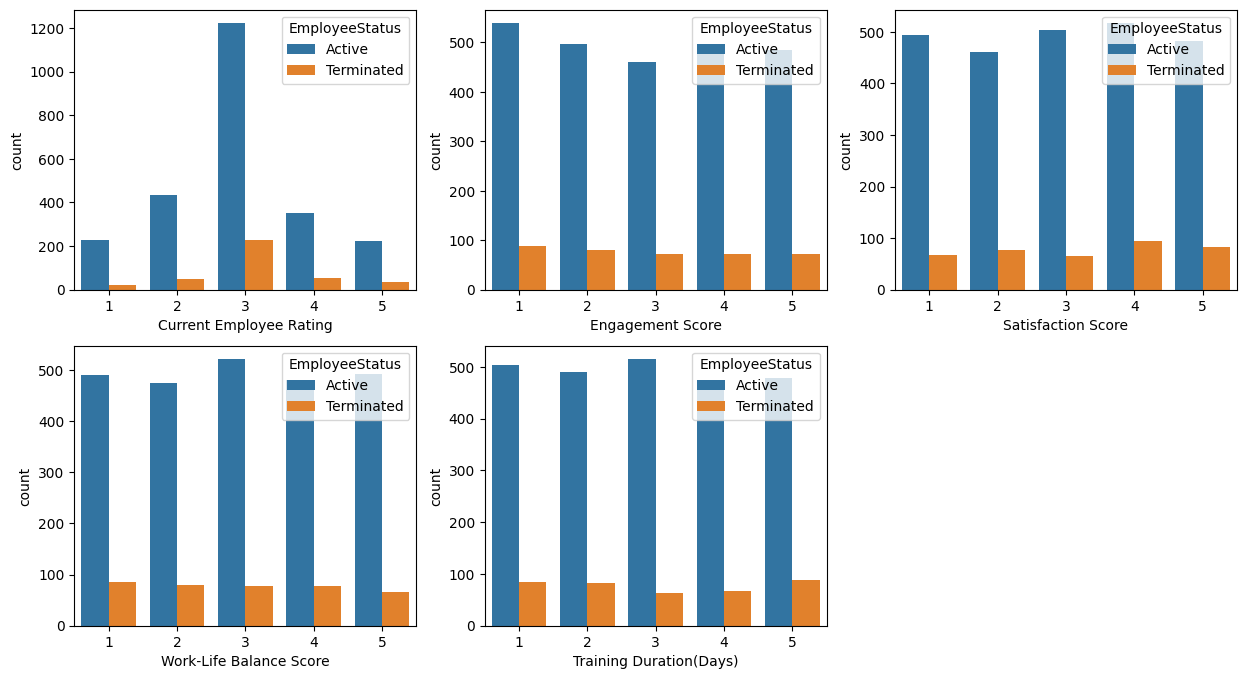

In [12]:
# Visualize the relation between two numerical column (Features and Target column)

plt.figure(figsize=(15, 8))
plt.subplot(2,3,1)
sns.countplot(x = 'Current Employee Rating', hue = 'EmployeeStatus', data = employee)
plt.subplot(2,3,2)
sns.countplot(x = 'Engagement Score', hue = 'EmployeeStatus', data = employee)
plt.subplot(2,3,3)
sns.countplot(x = 'Satisfaction Score', hue = 'EmployeeStatus', data = employee)
plt.subplot(2,3,4)
sns.countplot(x = 'Work-Life Balance Score', hue = 'EmployeeStatus', data = employee)
plt.subplot(2,3,5)
sns.countplot(x = 'Training Duration(Days)', hue = 'EmployeeStatus', data = employee)

plt.show()

#### Insights

1.   **Current Employee Rating:**

  *   shows the distribution of Active and Terminated employees across different employee rating levels
  *   employees with **lower ratings** are more **likely to be terminated** compared to those with higher ratings

2.   **Engagement Score:**

  *   reveals the relationship between employee engagement and attrition
  *   **lower engagement scores** are associated with a **higher termination rate**

1.   **Satisfaction Score:**

  *   link between employee satisfaction and their employment status
  *   employees with **lower satisfaction scores** are **more prone to leaving** the company

2.   **Work-Life Balance Score:**

  *   impact of work-life balance on employee retention
  *   employees with **poorer work-life balance** scores are more likely to be **terminated**

1.   **Training Duration (Days):**

  *   relationship between training duration and employee status
  *   employees who received **shorter training durations** have high termination rates.













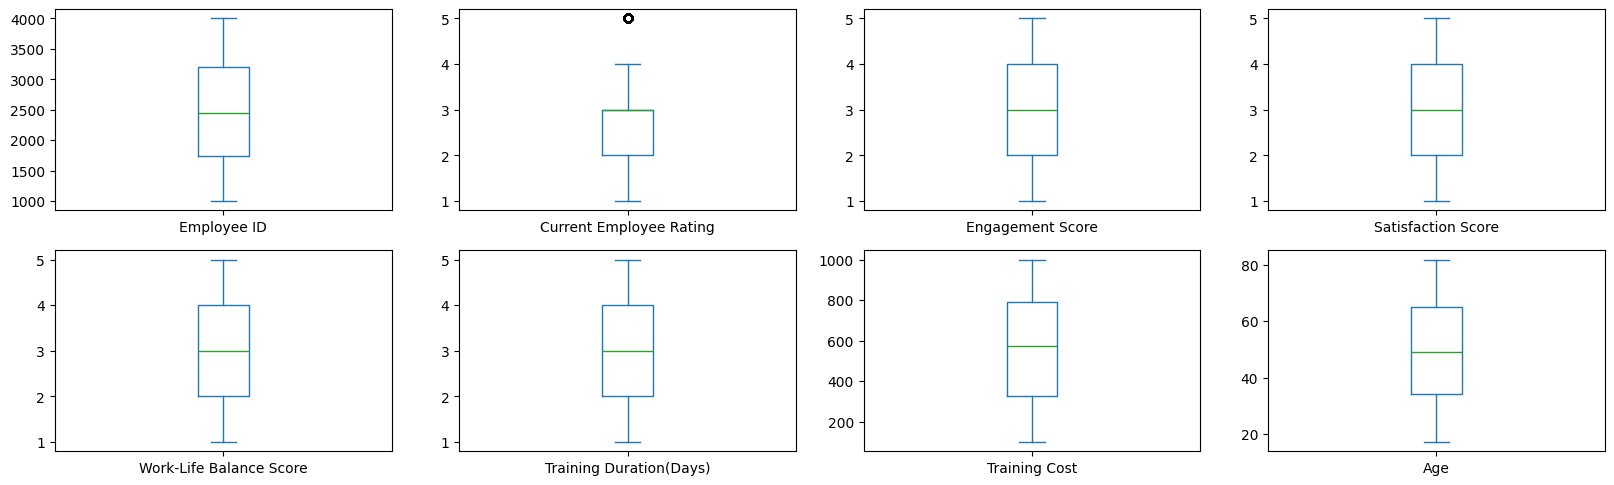

In [13]:
# Check for Outliers in all the Feautres column

fig, axes = plt.subplots(figsize=(20, 12))
employee.drop('EmployeeStatus', axis =1).plot(kind = 'box', subplots = True, ax=axes, layout = (4, 4))
plt.show()

In [14]:
# Check for Numerical Features statistical description

employee.describe()

,Employee ID,Current Employee Rating,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Duration(Days),Training Cost,Age
count,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000
mean,2470.591916,2.974692,2.941652,3.028471,2.989104,2.973989,559.278956,49.448506
std,859.450107,1.012610,1.435230,1.410067,1.408816,1.419682,263.333611,17.689179
min,1001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.040000,17.000000
25%,1736.000000,2.000000,2.000000,2.000000,2.000000,2.000000,328.060000,34.000000
50%,2456.000000,3.000000,3.000000,3.000000,3.000000,3.000000,571.810000,49.000000
75%,3197.000000,3.000000,4.000000,4.000000,4.000000,4.000000,788.330000,65.000000
max,4000.000000,5.000000,5.000000,5.000000,5.000000,5.000000,999.970000,82.000000


### Data Pre-Processing

In [15]:
# Separate all the Numerical columns in separate variable

numerical_columns = employee.select_dtypes(include=np.number).columns
numerical_columns

Index(['Employee ID', 'Current Employee Rating', 'Engagement Score',
       'Satisfaction Score', 'Work-Life Balance Score',
       'Training Duration(Days)', 'Training Cost', 'Age'],
      dtype='object')

In [16]:
# Separate all the categorical columns in separate variable

categorical_columns = employee.select_dtypes(exclude=np.number).columns
categorical_columns

Index(['StartDate', 'Title', 'BusinessUnit', 'EmployeeStatus', 'EmployeeType',
       'PayZone', 'EmployeeClassificationType', 'DepartmentType', 'Division',
       'DOB', 'State', 'GenderCode', 'RaceDesc', 'MaritalDesc',
       'Performance Score', 'Survey Date', 'Training Date',
       'Training Program Name', 'Training Type', 'Training Outcome'],
      dtype='object')

In [17]:
# Convert Date column data type from object to date time

employee['StartDate'] = pd.to_datetime(employee['StartDate'])
employee['DOB'] = pd.to_datetime(employee['DOB'], format='%d-%m-%Y')
employee['Survey Date'] = pd.to_datetime(employee['Survey Date'])

In [18]:
# Correlation between Features (Numerical column)
corr = employee[numerical_columns].corr()
corr


,Employee ID,Current Employee Rating,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Duration(Days),Training Cost,Age
Employee ID,1.000000,-0.016471,0.014512,0.018004,-0.020639,-0.003982,-0.019489,0.004797
Current Employee Rating,-0.016471,1.000000,0.022210,-0.024613,0.028151,0.005901,0.010757,-0.020115
Engagement Score,0.014512,0.022210,1.000000,-0.004391,0.025596,0.002879,0.020968,-0.033427
Satisfaction Score,0.018004,-0.024613,-0.004391,1.000000,-0.032766,0.024258,0.000665,-0.006391
Work-Life Balance Score,-0.020639,0.028151,0.025596,-0.032766,1.000000,0.003023,0.008013,-0.011811
Training Duration(Days),-0.003982,0.005901,0.002879,0.024258,0.003023,1.000000,-0.015842,0.003657
Training Cost,-0.019489,0.010757,0.020968,0.000665,0.008013,-0.015842,1.000000,-0.001903
Age,0.004797,-0.020115,-0.033427,-0.006391,-0.011811,0.003657,-0.001903,1.000000


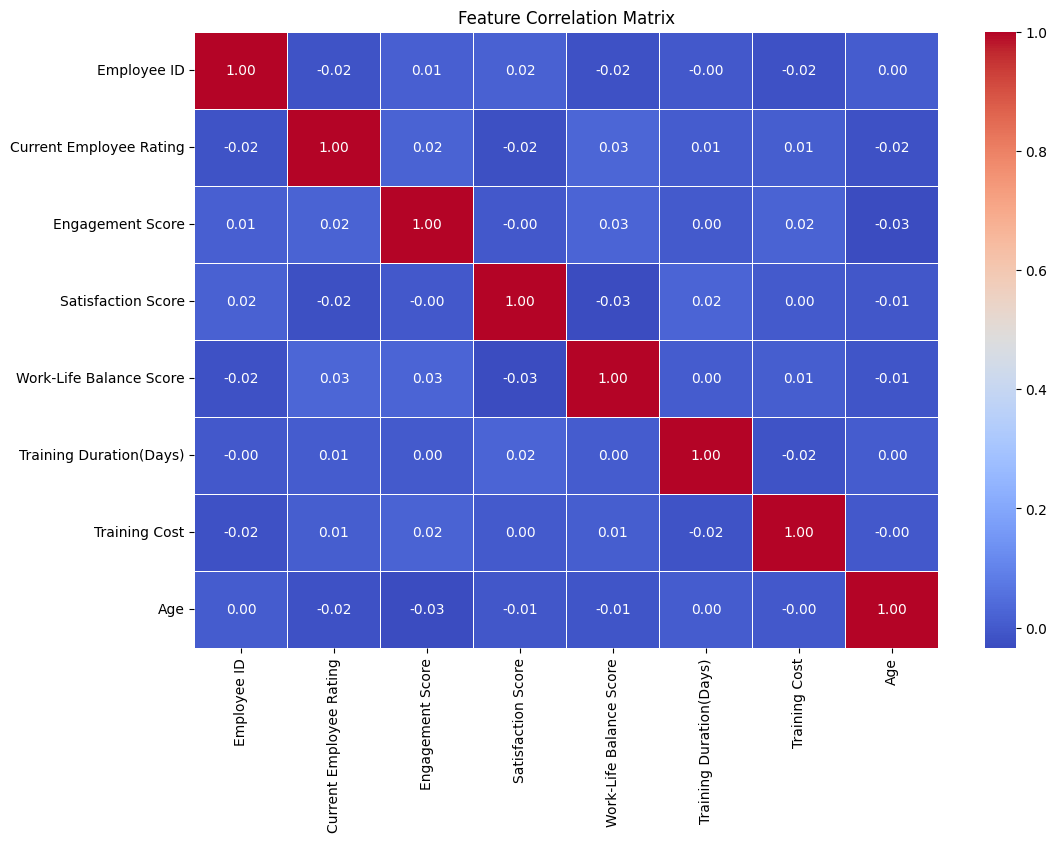

In [19]:
# Plot the HEAT MAP to visualize the correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


## Task 3: Feature Engineering

LABEL-ENCODER

In [20]:
# Convert categorical columns to numerical column

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_columns:
  employee[col] = le.fit_transform(employee[col])

In [21]:
# Check dataframe after encoding
employee.head()

,Employee ID,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,...,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
0,3427,326,22,1,0,0,2,2,3,8,...,1,2,3,174,2,1,1,2,606.11,50
1,3428,1330,22,2,0,0,0,1,3,0,...,2,1,5,144,1,0,2,4,673.02,58
2,3429,103,2,5,0,1,1,1,4,11,...,1,2,1,146,2,0,1,2,413.28,27
3,3430,844,2,1,0,0,0,0,4,8,...,5,5,4,171,3,0,0,3,663.78,23
4,3431,266,2,8,0,0,0,2,4,9,...,2,5,3,150,4,0,1,5,399.03,50


In [22]:
# Check for Statistical summary

employee.describe()

,Employee ID,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,...,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
count,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,...,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000
mean,2470.591916,732.236907,18.723023,4.494903,0.136028,0.981019,0.959578,1.004921,2.944112,9.430931,...,2.941652,3.028471,2.989104,183.520914,1.952548,0.499473,1.496309,2.973989,559.278956,49.448506
std,859.450107,425.163645,7.728783,2.874984,0.342879,0.805871,0.818722,0.827178,0.831457,6.319652,...,1.435230,1.410067,1.408816,104.789176,1.430848,0.500088,1.125590,1.419682,263.333611,17.689179
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,100.040000,17.000000
25%,1736.000000,362.000000,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,6.000000,...,2.000000,2.000000,2.000000,93.000000,1.000000,0.000000,0.000000,2.000000,328.060000,34.000000
50%,2456.000000,735.000000,22.000000,4.000000,0.000000,1.000000,1.000000,1.000000,3.000000,8.000000,...,3.000000,3.000000,3.000000,186.000000,2.000000,0.000000,2.000000,3.000000,571.810000,49.000000
75%,3197.000000,1099.000000,23.000000,7.000000,0.000000,2.000000,2.000000,2.000000,3.000000,12.000000,...,4.000000,4.000000,4.000000,273.000000,3.000000,1.000000,2.000000,4.000000,788.330000,65.000000
max,4000.000000,1471.000000,31.000000,9.000000,1.000000,2.000000,2.000000,2.000000,5.000000,24.000000,...,5.000000,5.000000,5.000000,365.000000,4.000000,1.000000,3.000000,5.000000,999.970000,82.000000


NO Outliers were found

## Step 4: Feature Selection

**CHI-SQUARE TEST**

In [23]:
# Chi-Square Test
from sklearn.feature_selection import chi2

In [24]:
features = employee[['Employee ID', 'StartDate', 'Title', 'BusinessUnit', 'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'DepartmentType', 'Division', 'DOB', 'State', 'GenderCode', 'RaceDesc',
       'MaritalDesc', 'Performance Score', 'Current Employee Rating',
       'Survey Date', 'Engagement Score', 'Satisfaction Score',
       'Work-Life Balance Score', 'Training Date', 'Training Program Name',
       'Training Type', 'Training Outcome', 'Training Duration(Days)',
       'Training Cost', 'Age']]
target = employee['EmployeeStatus']

In [25]:
# Saving the results of the chi2 function in the score variable for further analysis and interpretation
score = chi2(features, target)
score


(array([1.17539895e+03, 1.05331352e+03, 1.23756061e+02, 1.50300594e+00,
        3.41223333e-02, 1.42160859e+00, 5.10397766e-01, 1.21815250e+00,
        6.46415326e+00, 1.23130220e-01, 2.48149788e+00, 2.19013360e+00,
        7.46982447e-01, 2.18777504e-02, 9.33780715e-01, 1.43612962e+00,
        8.59929277e+01, 2.74100045e-01, 1.20850481e+00, 1.28116498e+00,
        3.51964135e+01, 9.09237938e-01, 5.24490059e-04, 4.98266310e+00,
        9.45403501e-03, 1.03680476e+02, 2.44436675e-01]),
 array([1.35468975e-257, 4.63579689e-231, 9.52639668e-029, 2.20209427e-001,
        8.53446843e-001, 2.33138818e-001, 4.74966717e-001, 2.69723529e-001,
        1.10072077e-002, 7.25664003e-001, 1.15192502e-001, 1.38897267e-001,
        3.87433291e-001, 8.82412776e-001, 3.33882432e-001, 2.30766680e-001,
        1.80580306e-020, 6.00594594e-001, 2.71628442e-001, 2.57682540e-001,
        2.98071989e-009, 3.40316697e-001, 9.81728646e-001, 2.56025427e-002,
        9.22542266e-001, 2.37722308e-024, 6.21019919e-

In [26]:
# Rank the features in descending order based on P-value
p_values = pd.Series(score[1], index = features.columns)
p_values.sort_values(ascending = False)

,0
Training Type,9.817286e-01
Training Duration(Days),9.225423e-01
MaritalDesc,8.824128e-01
EmployeeType,8.534468e-01
DOB,7.256640e-01
Age,6.210199e-01
Engagement Score,6.005946e-01
EmployeeClassificationType,4.749667e-01
RaceDesc,3.874333e-01
Training Program Name,3.403167e-01


FEATURE SELECTION on P-VALUE

In [27]:
# Classify features based on threshold (0.05)
irr_features = []


for i in p_values.index:
    if p_values[i] <= 0.05:
        print("--"*35)
        print(i, " :- Null Hypothesis - REJECTED, Feature is IMPORTANT")
        print("--"*35)
    else:
        print(i, " :- Null Hypothesis - ACCEPTED, Feature is not Important")
        irr_features.append(i)


----------------------------------------------------------------------
Employee ID  :- Null Hypothesis - REJECTED, Feature is IMPORTANT
----------------------------------------------------------------------
----------------------------------------------------------------------
StartDate  :- Null Hypothesis - REJECTED, Feature is IMPORTANT
----------------------------------------------------------------------
----------------------------------------------------------------------
Title  :- Null Hypothesis - REJECTED, Feature is IMPORTANT
----------------------------------------------------------------------
BusinessUnit  :- Null Hypothesis - ACCEPTED, Feature is not Important
EmployeeType  :- Null Hypothesis - ACCEPTED, Feature is not Important
PayZone  :- Null Hypothesis - ACCEPTED, Feature is not Important
EmployeeClassificationType  :- Null Hypothesis - ACCEPTED, Feature is not Important
DepartmentType  :- Null Hypothesis - ACCEPTED, Feature is not Important
--------------------------

In [28]:
# Saving irrelevant features in new variable
irr_features


['BusinessUnit',
 'EmployeeType',
 'PayZone',
 'EmployeeClassificationType',
 'DepartmentType',
 'DOB',
 'State',
 'GenderCode',
 'RaceDesc',
 'MaritalDesc',
 'Performance Score',
 'Current Employee Rating',
 'Engagement Score',
 'Satisfaction Score',
 'Work-Life Balance Score',
 'Training Program Name',
 'Training Type',
 'Training Duration(Days)',
 'Age']

In [29]:
# Dropping all feature which are irrelevant as obtained in chi-square test
employee.drop(labels = irr_features, axis=1,inplace = True)

In [30]:
employee.head()

,Employee ID,StartDate,Title,EmployeeStatus,Division,Survey Date,Training Date,Training Outcome,Training Cost
0,3427,326,22,0,8,162,174,1,606.11
1,3428,1330,22,0,0,35,144,2,673.02
2,3429,103,2,0,11,295,146,1,413.28
3,3430,844,2,0,8,315,171,0,663.78
4,3431,266,2,0,9,112,150,1,399.03


#### Splitting Dataset without Balancing

In [31]:
# Assigning all columns except employee status to X (the features or independent variables)
X = employee.drop('EmployeeStatus', axis = 1)

# Assigning the sales column to y (the target or dependent variable)
y = employee.EmployeeStatus


## Task 7 : Balancing the dataset - SMOTE

In [32]:
# Import SMOTE from library
from imblearn.over_sampling import SMOTE

In [33]:
# Importing the libraries for TRAIN and TEST Split
from sklearn.model_selection import train_test_split

In [34]:
# create synthetic data points for the minority class (churn)
# x and y = imbalanced dataset
# x_SMOTE, y_SMOTE = Balanced dataset

sm = SMOTE(random_state=12)
x_SMOTE, y_SMOTE = sm.fit_resample(X, y)

In [35]:
x_SMOTE.shape, y_SMOTE.shape

((4916, 8), (4916,))

In [36]:
y_SMOTE.value_counts()

,count
EmployeeStatus,
0,2458
1,2458


In [37]:
# Splitting the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(x_SMOTE, y_SMOTE, test_size = 0.2, random_state = 40)

## Task 6: Model Building

### 1. Decision Tree

In [38]:
# Import the Decision Tree classifier

#from sklearn.tree import DecisionTreeClassifier
#dt_smote = DecisionTreeClassifier(
#    criterion='gini',
#    splitter='best',
#    max_depth=5,
#    min_samples_split=2,
#    min_samples_leaf=1,
#    random_state=42
#)

In [39]:
# Import the Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
dt_smote = DecisionTreeClassifier()

In [40]:
# Fit the training data on Decision Treee Classifier
dt_smote.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
# Making Prediction on train data

X_train_pred_dt_smote = dt_smote.predict(X_train)

In [42]:
# Making Prediction on test data by trained SVM

X_test_pred_dt_smote = dt_smote.predict(X_test)

In [43]:
# Printing the score on Training data
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

print("TRAINING DATA Result")
print("--"*25)
print("Accuracy Score ( Decision Tree + SMOTE ) : ", round(accuracy_score(y_train, X_train_pred_dt_smote)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE ) : ", round(f1_score(y_train, X_train_pred_dt_smote)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE ) : ", round(roc_auc_score(y_train, X_train_pred_dt_smote)*100,2), "%")

TRAINING DATA Result
--------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE ) :  100.0 %
F1-Score       ( Decision Tree + SMOTE ) :  100.0 %
AUC-Score      ( Decision Tree + SMOTE ) :  100.0 %


In [44]:
# Printing the score on Test data
print("TESTING DATA Result")
print("--"*25)
print("Accuracy Score ( Decision Tree + SMOTE ) : ", round(accuracy_score(y_test, X_test_pred_dt_smote)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE ) : ", round(f1_score(y_test, X_test_pred_dt_smote)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE ) : ", round(roc_auc_score(y_test, X_test_pred_dt_smote)*100,2), "%")

TESTING DATA Result
--------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE ) :  79.98 %
F1-Score       ( Decision Tree + SMOTE ) :  80.48 %
AUC-Score      ( Decision Tree + SMOTE ) :  79.97 %


We can observe a clear **difference between** the **Training** data and **Testing** data set Accuracy score.

**20% difference** shows that there **might be Over-Fitting** and so we need to find the best parameters by **Hyper-Parameter Tuning**.

## Task 7 : Hyperparameter Tuning for Decision Tree

### 1. Grid Search CV

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4, 5, 6, 7],

}

In [47]:
grid_search = GridSearchCV(estimator=dt_smote, param_grid=param_grid, cv=3)

In [48]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [49]:
# Printing the best hyperparameter when using GridSearchCV on Decision Tree

print("Best Hyperparameter: ", grid_search.best_params_)

Best Hyperparameter:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 4}


Passing the best Hyper-Parameters

In [50]:
dt_smote_grid = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, min_samples_split = 3)
dt_smote_grid.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=3)

In [51]:
# Making Prediction on train data

X_train_pred_dt_smote_grid = dt_smote_grid.predict(X_train)

In [52]:
# Making Prediction on test data

X_test_pred_dt_smote_grid = dt_smote_grid.predict(X_test)

In [53]:
# Printing the score on Training data
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

print("TRAINING DATA Result")
print("--"*35)
print("Accuracy Score ( Decision Tree + SMOTE + GridSearch) : ", round(accuracy_score(y_train, X_train_pred_dt_smote_grid)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE + GridSearch) : ", round(f1_score(y_train, X_train_pred_dt_smote_grid)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE + GridSearch) : ", round(roc_auc_score(y_train, X_train_pred_dt_smote_grid)*100,2), "%")

TRAINING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE + GridSearch) :  69.68 %
F1-Score       ( Decision Tree + SMOTE + GridSearch) :  74.98 %
AUC-Score      ( Decision Tree + SMOTE + GridSearch) :  69.7 %


In [54]:
# Printing the score on Test data
print("TESTING DATA Result")
print("--"*35)
print("Accuracy Score ( Decision Tree + SMOTE + GridSearch) : ", round(accuracy_score(y_test, X_test_pred_dt_smote_grid)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE + GridSearch) : ", round(f1_score(y_test, X_test_pred_dt_smote_grid)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE + GridSearch) : ", round(roc_auc_score(y_test, X_test_pred_dt_smote_grid)*100,2), "%")

TESTING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE + GridSearch) :  66.87 %
F1-Score       ( Decision Tree + SMOTE + GridSearch) :  72.56 %
AUC-Score      ( Decision Tree + SMOTE + GridSearch) :  66.83 %


**Conclusion :**

*   Using **Grid Search CV**, we were able to **reduce the Over-fitting** as the **difference** between Training and Testing data set got **reduced to 3%**
*   However, the **Accuracy** score got dropped to **67% on Testing dataset** from **69% on Training dataset**.



### 2. RandomSearch CV

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
# Pasing the hyperparameter distribution
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 10),
    'min_samples_split': np.arange(2, 15),

}

In [57]:
random_search = RandomizedSearchCV(estimator=dt_smote, param_distributions=param_dist, cv=5)

In [58]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [59]:
# Printing the best hyperparameter when using RandomSearchCV on Decision Tree

print("Best Hyperparameters: ", random_search.best_params_)

Best Hyperparameters:  {'min_samples_split': np.int64(3), 'max_depth': np.int64(9), 'criterion': 'entropy'}


In [60]:
# Passing the best hyperparameter on Decision Tree

dt_smote_random = DecisionTreeClassifier(criterion = 'entropy', max_depth = 9, min_samples_split=7)
dt_smote_random.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=7)

In [61]:
# Making Prediction on train data

X_train_pred_dt_smote_random = dt_smote_random.predict(X_train)

In [62]:
# Making Prediction on test data

X_test_pred_dt_smote_random = dt_smote_random.predict(X_test)

In [63]:
# Printing the score on Training data
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

print("TRAINING DATA Result")
print("--"*35)
print("Accuracy Score ( Decision Tree + SMOTE + RandomSearch) : ", round(accuracy_score(y_train, X_train_pred_dt_smote_random)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE + RandomSearch) : ", round(f1_score(y_train, X_train_pred_dt_smote_random)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE + RandomSearch) : ", round(roc_auc_score(y_train, X_train_pred_dt_smote_random)*100,2), "%")

TRAINING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE + RandomSearch) :  72.46 %
F1-Score       ( Decision Tree + SMOTE + RandomSearch) :  76.4 %
AUC-Score      ( Decision Tree + SMOTE + RandomSearch) :  72.47 %


In [64]:
# Printing the score on Test data
print("TESTING DATA Result")
print("--"*35)
print("Accuracy Score ( Decision Tree + SMOTE + RandomSearch) : ", round(accuracy_score(y_test, X_test_pred_dt_smote_random)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE + RandomSearch) : ", round(f1_score(y_test, X_test_pred_dt_smote_random)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE + RandomSearch) : ", round(roc_auc_score(y_test, X_test_pred_dt_smote_random)*100,2), "%")

TESTING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE + RandomSearch) :  69.41 %
F1-Score       ( Decision Tree + SMOTE + RandomSearch) :  73.53 %
AUC-Score      ( Decision Tree + SMOTE + RandomSearch) :  69.38 %


**Conclusion :**

*   Using **Random Search CV** also, we were able to **reduce the Over-fitting** as the **difference** between Training and Testing data set got **reduced to 3%**
*   However, the **Accuracy** score got dropped to **69% on Testing dataset**  from **72% on Training dataset**.



### 3. Bayesian Optimization

In [65]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.1 MB/s eta 0:00:00


In [66]:
from skopt import BayesSearchCV

In [67]:
# Passing the Hyperparameter values

search_space = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 15),
    'min_samples_split': np.arange(2, 15),
}

In [68]:
bayes_search = BayesSearchCV(estimator=dt_smote, search_spaces=search_space, cv=5)

In [69]:
bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=DecisionTreeClassifier(),
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                             'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [70]:
# Printing the best hyperparameter when using Bayesian Optimization on Decision Tree

print("Best Hyperparameters: ", bayes_search.best_params_)

Best Hyperparameters:  OrderedDict([('criterion', 'entropy'), ('max_depth', 14), ('min_samples_split', 5)])


In [71]:
dt_smote_bayes = DecisionTreeClassifier(criterion = 'entropy', max_depth = 14, min_samples_split=2)
dt_smote_bayes.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14)

In [72]:
# Making Prediction on train data

X_train_pred_dt_smote_bayes = dt_smote_bayes.predict(X_train)

In [73]:
# Making Prediction on test data

X_test_pred_dt_smote_bayes = dt_smote_bayes.predict(X_test)

In [74]:
# Printing the score on Training data
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

print("TRAINING DATA Result")
print("--"*35)
print("Accuracy Score ( Decision Tree + SMOTE + Bayesian ) : ", round(accuracy_score(y_train, X_train_pred_dt_smote_bayes)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE + Bayesian ) : ", round(f1_score(y_train, X_train_pred_dt_smote_bayes)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE + Bayesian ) : ", round(roc_auc_score(y_train, X_train_pred_dt_smote_bayes)*100,2), "%")

TRAINING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE + Bayesian ) :  83.21 %
F1-Score       ( Decision Tree + SMOTE + Bayesian ) :  84.39 %
AUC-Score      ( Decision Tree + SMOTE + Bayesian ) :  83.22 %


In [75]:
# Printing the score on Test data
print("TESTING DATA Result")
print("--"*35)
print("Accuracy Score ( Decision Tree + SMOTE + Bayesian ) : ", round(accuracy_score(y_test, X_test_pred_dt_smote_bayes)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE + Bayesian ) : ", round(f1_score(y_test, X_test_pred_dt_smote_bayes)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE + Bayesian ) : ", round(roc_auc_score(y_test, X_test_pred_dt_smote_bayes)*100,2), "%")

TESTING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE + Bayesian ) :  73.58 %
F1-Score       ( Decision Tree + SMOTE + Bayesian ) :  76.06 %
AUC-Score      ( Decision Tree + SMOTE + Bayesian ) :  73.56 %


**Conclusion :**

*   Using **Bayesian Search CV** also, we were able to **increase** the over-all **AUC score to 73%** but the **difference** between **Training** and **Testing** data set also got **increased to 10%**
*   However, the **Accuracy** score got dropped to **73% on Testing dataset**  from **83% on Training dataset**.



## Task 8 : Boosting Algorithm on Decision Tree

### 1. AdaBoost with Grid Search CV

In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
dt_smote_grid_adaBoost = AdaBoostClassifier(estimator=dt_smote_grid, n_estimators= 50, learning_rate= 0.1)

In [78]:
# Fit the training data on AdaBoost Classifier
dt_smote_grid_adaBoost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=7,
                                                    min_samples_split=3),
                   learning_rate=0.1)

In [79]:
# Making Prediction on train data

X_train_pred_dt_smote_grid_adaBoost = dt_smote_grid_adaBoost.predict(X_train)

In [80]:
# Making Prediction on test data by trained SVM

X_test_pred_dt_smote_grid_adaBoost = dt_smote_grid_adaBoost.predict(X_test)

In [81]:
# Printing the score on Training data
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

print("TRAINING DATA Result")
print("--"*25)
print("Accuracy Score ( Decision Tree + SMOTE + Grid + AdaBoost ) : ", round(accuracy_score(y_train, X_train_pred_dt_smote_grid_adaBoost)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE + Grid + AdaBoost ) : ", round(f1_score(y_train, X_train_pred_dt_smote_grid_adaBoost)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE + Grid + AdaBoost ) : ", round(roc_auc_score(y_train, X_train_pred_dt_smote_grid_adaBoost)*100,2), "%")

TRAINING DATA Result
--------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE + Grid + AdaBoost ) :  81.94 %
F1-Score       ( Decision Tree + SMOTE + Grid + AdaBoost ) :  83.28 %
AUC-Score      ( Decision Tree + SMOTE + Grid + AdaBoost ) :  81.95 %


In [82]:
# Printing the score on Testing data

print("TESTING DATA Result")
print("--"*25)
print("Accuracy Score ( Decision Tree + SMOTE + Grid + AdaBoost ) : ", round(accuracy_score(y_test, X_test_pred_dt_smote_grid_adaBoost)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE + Grid + AdaBoost ) : ", round(f1_score(y_test, X_test_pred_dt_smote_grid_adaBoost)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE + Grid + AdaBoost ) : ", round(roc_auc_score(y_test, X_test_pred_dt_smote_grid_adaBoost)*100,2), "%")

TESTING DATA Result
--------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE + Grid + AdaBoost ) :  76.93 %
F1-Score       ( Decision Tree + SMOTE + Grid + AdaBoost ) :  78.73 %
AUC-Score      ( Decision Tree + SMOTE + Grid + AdaBoost ) :  76.91 %


**Summary -**

*   **Boosting Algorithm - AdaBoost with Hyper-tunned with Grid Search** on **DECISION TREE** clearly **increases the AUC** score to **77%** for **Testing** data and also reduces tha gap between testing and training, bringing AUC score to **82%** for **Training** data.

*   A **difference of 5%** between testing and traing and overall **increase in the AUC / Accuracy** score recommends this model.


*   The result is also far **better as compared to Decision Tree Hyper-tunned with Grid Search** but **Boosting algorithm was NOT applied**. The AUC score was **69% on Training** and **66% on Testing** data.




### 1. AdaBoost with Random Search CV

In [83]:
from sklearn.ensemble import AdaBoostClassifier

In [226]:
dt_smote_random_adaBoost = AdaBoostClassifier(estimator=dt_smote_random, n_estimators= 50, learning_rate= 0.05)

In [227]:
# Fit the training data on AdaBoost Classifier
dt_smote_random_adaBoost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=9,
                                                    min_samples_split=7),
                   learning_rate=0.05)

In [228]:
# Making Prediction on train data

X_train_pred_dt_smote_random_adaBoost = dt_smote_random_adaBoost.predict(X_train)

In [229]:
# Making Prediction on test data by trained SVM

X_test_pred_dt_smote_random_adaBoost = dt_smote_random_adaBoost.predict(X_test)

In [230]:
# Printing the score on Training data
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

print("TRAINING DATA Result")
print("--"*25)
print("Accuracy Score ( Decision Tree + SMOTE + Random + AdaBoost ) : ", round(accuracy_score(y_train, X_train_pred_dt_smote_random_adaBoost)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE + Random + AdaBoost ) : ", round(f1_score(y_train, X_train_pred_dt_smote_random_adaBoost)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE + Random + AdaBoost ) : ", round(roc_auc_score(y_train, X_train_pred_dt_smote_random_adaBoost)*100,2), "%")

TRAINING DATA Result
--------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE + Random + AdaBoost ) :  81.33 %
F1-Score       ( Decision Tree + SMOTE + Random + AdaBoost ) :  83.3 %
AUC-Score      ( Decision Tree + SMOTE + Random + AdaBoost ) :  81.34 %


In [231]:
# Printing the score on Testing data

print("TESTING DATA Result")
print("--"*25)
print("Accuracy Score ( Decision Tree + SMOTE + Random + AdaBoost ) : ", round(accuracy_score(y_test, X_test_pred_dt_smote_random_adaBoost)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE + Random + AdaBoost ) : ", round(f1_score(y_test, X_test_pred_dt_smote_random_adaBoost)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE + Random + AdaBoost ) : ", round(roc_auc_score(y_test, X_test_pred_dt_smote_random_adaBoost)*100,2), "%")

TESTING DATA Result
--------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE + Random + AdaBoost ) :  75.91 %
F1-Score       ( Decision Tree + SMOTE + Random + AdaBoost ) :  78.86 %
AUC-Score      ( Decision Tree + SMOTE + Random + AdaBoost ) :  75.89 %


**Result Analysis**

*   Using Boosting Algorithm, **AdaBoost Hyper-tunned with Random Search** on **DECISION TREE** we were able to **achieve higher AUC score** on both the **Training and Testing** dataset with **difference** between the score to **6%**, but it was 1% less Accurate than AdaBoost Hyper-tunned with Grid Search.
*   Paasing **Random search CV result** which was already Hyper-Parameter tunned to **AdaBoost** helped to achieved **AUC score of 82% on Training** data and **76% on Testing** data.

*   The above result is better as compared to when **AdaBoost was not used with Random Search** for Decision Tree and we got **AUC score of 72% on Training** and **69% on Testing** data.

*   Hence, so far **recommended model** for **DECISION TREE** is **AdaBoost** with Decision Tree Hyper tunned with **Grid Search**.






### 1. AdaBoost with Bayesian Search CV

In [123]:
from sklearn.ensemble import AdaBoostClassifier

In [202]:
dt_smote_bayes_adaBoost = AdaBoostClassifier(estimator=dt_smote_bayes, n_estimators= 100, learning_rate= 0.9)

In [203]:
# Fit the training data on AdaBoost Classifier
dt_smote_bayes_adaBoost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=14),
                   learning_rate=0.9, n_estimators=100)

In [204]:
# Making Prediction on train data

X_train_pred_dt_smote_bayes_adaBoost = dt_smote_bayes_adaBoost.predict(X_train)

In [205]:
# Making Prediction on test data by trained SVM

X_test_pred_dt_smote_bayes_adaBoost = dt_smote_bayes_adaBoost.predict(X_test)

In [206]:
# Printing the score on Training data
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

print("TRAINING DATA Result")
print("--"*40)
print("Accuracy Score ( Decision Tree + SMOTE + Bayes + AdaBoost) : ", round(accuracy_score(y_train, X_train_pred_dt_smote_bayes_adaBoost)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE + Bayes + AdaBoost) : ", round(f1_score(y_train, X_train_pred_dt_smote_bayes_adaBoost)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE + Bayes + AdaBoost) : ", round(roc_auc_score(y_train, X_train_pred_dt_smote_bayes_adaBoost)*100,2), "%")

TRAINING DATA Result
--------------------------------------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE + Bayes + AdaBoost) :  100.0 %
F1-Score       ( Decision Tree + SMOTE + Bayes + AdaBoost) :  100.0 %
AUC-Score      ( Decision Tree + SMOTE + Bayes + AdaBoost) :  100.0 %


In [207]:
# Printing the score on Testing data

print("TESTING DATA Result")
print("--"*40)
print("Accuracy Score ( Decision Tree + SMOTE + Bayes + AdaBoost ) : ", round(accuracy_score(y_test, X_test_pred_dt_smote_bayes_adaBoost)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE + Bayes + AdaBoost ) : ", round(f1_score(y_test, X_test_pred_dt_smote_bayes_adaBoost)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE + Bayes + AdaBoost ) : ", round(roc_auc_score(y_test, X_test_pred_dt_smote_bayes_adaBoost)*100,2), "%")

TESTING DATA Result
--------------------------------------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE + Bayes + AdaBoost ) :  92.89 %
F1-Score       ( Decision Tree + SMOTE + Bayes + AdaBoost ) :  93.01 %
AUC-Score      ( Decision Tree + SMOTE + Bayes + AdaBoost ) :  92.88 %


**Result Analysis**

*   Using Boosting Algorithm, **AdaBoost Hyper-tunned with Bayesian Optimization** on **DECISION TREE** we were able to **achieve higher AUC score** on both the **Training and Testing** dataset but with **difference** between the score rose to **7%**.
*   The **Training** data result was **100%** while the **testing** data result was **93%**.

*   The above result is better as compared to when Decision Tree was Hyper-tunned with Bayesian Optimization and Boosting Algorithm was not applied. and we got **AUC score of 83% on Training** and **73% on Testing** data.

*   Eventhough, the models shows us higher AUC / Accuracy score but the **difference margin** between **training** and **testing** data is also **Higher** as compared to previous two Boosting Algorithm. Hence, the **recommended model** is still **AdaBoost** with **Decision tree** Hyper-tunned with **Grid Seach**.







### 2. XGBoost (Extreme Gradient Boosting Mechanism) with Grid Search

In [232]:
from xgboost import XGBClassifier

In [233]:
#dt_smote_random_xgb = XGBClassifier(estimator=dt_smote_random)

In [234]:
dt_smote_grid_xgb = XGBClassifier(
    estimator=dt_smote_grid,  # Base estimator (Decision Tree)
    n_estimators=200,          # Number of boosting rounds (trees to build)
    learning_rate=0.2,         # Step size shrinkage used in update to prevents overfitting
    max_depth=3,              # Maximum depth of each tree
)

In [235]:
# Fit the training data on AdaBoost Classifier
dt_smote_grid_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False,
              estimator=DecisionTreeClassifier(max_depth=7,
                                               min_samples_split=3),
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [236]:
# Making Prediction on train data

X_train_pred_dt_smote_grid_xgb = dt_smote_grid_xgb.predict(X_train)

In [237]:
# Making Prediction on test data by trained SVM

X_test_pred_dt_smote_grid_xgb= dt_smote_grid_xgb.predict(X_test)

In [239]:
# Printing the score on Training data
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

print("TRAINING DATA Result")
print("--"*35)
print("Accuracy Score ( Decision Tree + SMOTE + Grid + XGBoost ) : ", round(accuracy_score(y_train, X_train_pred_dt_smote_grid_xgb)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE + Grid + XGBoost ) : ", round(f1_score(y_train, X_train_pred_dt_smote_grid_xgb)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE + Grid + XGBoost ) : ", round(roc_auc_score(y_train, X_train_pred_dt_smote_grid_xgb)*100,2), "%")

TRAINING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE + Grid + XGBoost ) :  89.29 %
F1-Score       ( Decision Tree + SMOTE + Grid + XGBoost ) :  89.55 %
AUC-Score      ( Decision Tree + SMOTE + Grid + XGBoost ) :  89.29 %


In [240]:
# Printing the score on Testing data

print("TESTING DATA Result")
print("--"*35)
print("Accuracy Score ( Decision Tree + SMOTE + Grid + XGBoost ) : ", round(accuracy_score(y_test, X_test_pred_dt_smote_grid_xgb)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE + Grid + XGBoost ) : ", round(f1_score(y_test, X_test_pred_dt_smote_grid_xgb)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE + Grid + XGBoost ) : ", round(roc_auc_score(y_test, X_test_pred_dt_smote_grid_xgb)*100,2), "%")

TESTING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE + Grid + XGBoost ) :  79.98 %
F1-Score       ( Decision Tree + SMOTE + Grid + XGBoost ) :  80.59 %
AUC-Score      ( Decision Tree + SMOTE + Grid + XGBoost ) :  79.97 %


**Result Analysis**

*   Using Boosting Algorithm, **XgBoost Hyper-tunned with Grid Search** on **DECISION TREE** we were able to **achieve higher AUC score** on both the **Training and Testing** dataset but with **difference** between the score rose to **9%**.
*   The **Training** data result was **89%** while the **testing** data result was **80%**.

*   The above result is better as compared to when Decision Tree was Hyper-tunned with Grid Search and AdaBoost was used as Boosting Algorithm and we got **AUC score of 82% on Training** and **77% on Testing** data.



### 2. XGBoost (Extreme Gradient Boosting Mechanism) with Random Search

In [241]:
from xgboost import XGBClassifier

In [306]:
dt_smote_random_xgboost = XGBClassifier(estimator=dt_smote_random, n_estimators= 50, learning_rate= 0.1)

In [307]:
# Fit the training data on AdaBoost Classifier
dt_smote_random_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False,
              estimator=DecisionTreeClassifier(criterion='entropy', max_depth=9,
                                               min_samples_split=7),
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [308]:
# Making Prediction on train data

X_train_pred_dt_smote_random_xgboost = dt_smote_random_xgboost.predict(X_train)

In [309]:
# Making Prediction on test data by trained SVM

X_test_pred_dt_smote_random_xgboost = dt_smote_random_xgboost.predict(X_test)

In [310]:
# Printing the score on Training data
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

print("TRAINING DATA Result")
print("--"*35)
print("Accuracy Score ( Decision Tree + SMOTE + Random + XGBoost ) : ", round(accuracy_score(y_train, X_train_pred_dt_smote_random_xgboost)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE + Random + XGBoost ) : ", round(f1_score(y_train, X_train_pred_dt_smote_random_xgboost)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE + Random + XGBoost ) : ", round(roc_auc_score(y_train, X_train_pred_dt_smote_random_xgboost)*100,2), "%")

TRAINING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE + Random + XGBoost ) :  86.67 %
F1-Score       ( Decision Tree + SMOTE + Random + XGBoost ) :  87.48 %
AUC-Score      ( Decision Tree + SMOTE + Random + XGBoost ) :  86.68 %


In [311]:
# Printing the score on Testing data

print("TESTING DATA Result")
print("--"*35)
print("Accuracy Score ( Decision Tree + SMOTE + Random + XGBoost ) : ", round(accuracy_score(y_test, X_test_pred_dt_smote_random_xgboost)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE + Random + XGBoost ) : ", round(f1_score(y_test, X_test_pred_dt_smote_random_xgboost)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE + Random + XGBoost ) : ", round(roc_auc_score(y_test, X_test_pred_dt_smote_random_xgboost)*100,2), "%")

TESTING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE + Random + XGBoost ) :  79.57 %
F1-Score       ( Decision Tree + SMOTE + Random + XGBoost ) :  80.73 %
AUC-Score      ( Decision Tree + SMOTE + Random + XGBoost ) :  79.56 %


**Result Analysis**

*   Using Boosting Algorithm, **XgBoost Hyper-tunned with Random Search** on **DECISION TREE** we were able to **achieve higher AUC score** on both the **Training and Testing** dataset but with **difference** between the score reduced to **6%**.
*   The **Training** data result was **86%** while the **testing** data result was **80%**.

*   The above result is better as compared to when Decision Tree was Hyper-tunned with Random Search and AdaBoost was used as Boosting Algorithm and we got **AUC score of 81% on Training** and **76% on Testing** data.

*   The above result is also better as compared to when Decision Tree was Hyper-tunned with Grid Search and XgBoost was used as Boosting Algorithm and we got **AUC score of 89% on Training** and **80% on Testing** data.
*   Hence, our **Recommended** model is **Decision tree** Hyper-tunned with **Random seach and XgBoost**.





### 2. XGBoost (Extreme Gradient Boosting Mechanism) with Bayesian Optimization

In [251]:
from xgboost import XGBClassifier

In [276]:
dt_smote_bayes_xgboost = XGBClassifier(estimator=dt_smote_bayes, n_estimators= 50, learning_rate= 0.1)

In [277]:
# Fit the training data on AdaBoost Classifier
dt_smote_bayes_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False,
              estimator=DecisionTreeClassifier(criterion='entropy',
                                               max_depth=14),
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [278]:
# Making Prediction on train data

X_train_pred_dt_smote_bayes_xgboost = dt_smote_bayes_xgboost.predict(X_train)

In [279]:
# Making Prediction on test data by trained SVM

X_test_pred_dt_smote_bayes_xgboost = dt_smote_bayes_xgboost.predict(X_test)

In [280]:
# Printing the score on Training data
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

print("TRAINING DATA Result")
print("--"*40)
print("Accuracy Score ( Decision Tree + SMOTE + Bayes + XGBoost ) : ", round(accuracy_score(y_train, X_train_pred_dt_smote_bayes_xgboost)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE + Bayes + XGBoost ) : ", round(f1_score(y_train, X_train_pred_dt_smote_bayes_xgboost)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE + Bayes + XGBoost ) : ", round(roc_auc_score(y_train, X_train_pred_dt_smote_bayes_xgboost)*100,2), "%")

TRAINING DATA Result
--------------------------------------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE + Bayes + XGBoost ) :  86.67 %
F1-Score       ( Decision Tree + SMOTE + Bayes + XGBoost ) :  87.48 %
AUC-Score      ( Decision Tree + SMOTE + Bayes + XGBoost ) :  86.68 %


In [281]:
# Printing the score on Testing data

print("TESTING DATA Result")
print("--"*40)
print("Accuracy Score ( Decision Tree + SMOTE + Bayes + XGBoost ) : ", round(accuracy_score(y_test, X_test_pred_dt_smote_bayes_xgboost)*100,2), "%")
print("F1-Score       ( Decision Tree + SMOTE + Bayes + XGBoost ) : ", round(f1_score(y_test, X_test_pred_dt_smote_bayes_xgboost)*100,2), "%")
print("AUC-Score      ( Decision Tree + SMOTE + Bayes + XGBoost ) : ", round(roc_auc_score(y_test, X_test_pred_dt_smote_bayes_xgboost)*100,2), "%")

TESTING DATA Result
--------------------------------------------------------------------------------
Accuracy Score ( Decision Tree + SMOTE + Bayes + XGBoost ) :  79.57 %
F1-Score       ( Decision Tree + SMOTE + Bayes + XGBoost ) :  80.73 %
AUC-Score      ( Decision Tree + SMOTE + Bayes + XGBoost ) :  79.56 %


**Result Analysis**

*   Using Boosting Algorithm, **XgBoost Hyper-tunned with Bayesian Optimization** on **DECISION TREE** we were able to **achieve higher AUC score** on both the **Training and Testing** dataset but with **difference** between the score reduced to **6%**.
*   The **Training** data result was **86%** while the **testing** data result was **80%**.

*   The above result is Exactly the SAME when Decision Tree was Hyper-tunned with Random Search and XgBoost was used as Boosting Algorithm and we got **AUC score of 86% on Training** and **79% on Testing** data.

*   The above result is also better as compared to when Decision Tree was Hyper-tunned with Grid Search and XgBoost was used as Boosting Algorithm and we got **AUC score of 89% on Training** and **80% on Testing** data.
*   Hence, our **Recommended** model is **Decision tree** Hyper-tunned with **Random seach and XgBoost** or **Bayesian and XgBoost**.





## Task 9 : Model Building

### 2. RANDOM FOREST

In [312]:
from sklearn.ensemble import RandomForestClassifier
rf_smote = RandomForestClassifier()

In [313]:
# Fit the training data on Random Forest Classifier
rf_smote.fit(X_train, y_train)

RandomForestClassifier()

In [314]:
# Making Prediction on train data

X_train_pred_rf_smote = rf_smote.predict(X_train)

In [315]:
# Making Prediction on test data by trained SVM

X_test_pred_rf_smote = rf_smote.predict(X_test)

In [318]:
# Printing the score on Training data
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

print("TRAINING DATA Result")
print("--"*25)
print("Accuracy Score ( Random Forest + SMOTE ) : ", round(accuracy_score(y_train, X_train_pred_rf_smote)*100,2), "%")
print("F1-Score       ( Random Forest + SMOTE ) : ", round(f1_score(y_train, X_train_pred_rf_smote)*100,2), "%")
print("AUC-Score      ( Random Forest + SMOTE ) : ", round(roc_auc_score(y_train, X_train_pred_rf_smote)*100,2), "%")


TRAINING DATA Result
--------------------------------------------------
Accuracy Score ( Random Forest + SMOTE ) :  100.0 %
F1-Score       ( Random Forest + SMOTE ) :  100.0 %
AUC-Score      ( Random Forest + SMOTE ) :  100.0 %


In [319]:
# Printing the score on Test data
print("TESTING DATA Result")
print("--"*25)
print("Accuracy Score ( Random Forest + SMOTE ) : ", round(accuracy_score(y_test, X_test_pred_rf_smote)*100,2), "%")
print("F1-Score       ( Random Forest + SMOTE ) : ", round(f1_score(y_test, X_test_pred_rf_smote)*100,2), "%")
print("AUC-Score      ( Random Forest + SMOTE ) : ", round(roc_auc_score(y_test, X_test_pred_rf_smote)*100,2), "%")

TESTING DATA Result
--------------------------------------------------
Accuracy Score ( Random Forest + SMOTE ) :  87.5 %
F1-Score       ( Random Forest + SMOTE ) :  87.76 %
AUC-Score      ( Random Forest + SMOTE ) :  87.5 %


**Summary :**

*   In comarison with Decision Tree, **Random Forest** clearly **outperformed** on the original dataset which was balanced.
*   Random Forest Testing **AUC score was 87%** as compared to **80%** achieved **by Decision Tree** on the same **Testing data**.

*   However, on **Training data** set **both** Random Forest and Decision Tree had a score of **100%**.
*   This also indicates that the Random Forest **model is Over-fitted** as there is **gap of 13% between testing and training** data so we need to **tune the Hyper-Parameter** in order to reduce the over-fitting.





## Task 10 : Hyperparameter Tuning for Random Forest

### 1. Grid  Search CV

In [320]:
from sklearn.model_selection import GridSearchCV


In [321]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4, 5, 6, 7],

}

In [322]:
grid_search = GridSearchCV(estimator=rf_smote, param_grid=param_grid, cv=3)

In [323]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [324]:
# Printing the best hyperparameter when using GridSearchCV on Random Forest

print("Best Hyperparameter: ", grid_search.best_params_)

Best Hyperparameter:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}


In [325]:
rf_smote_grid = RandomForestClassifier(criterion = 'gini', max_depth = 7, min_samples_split = 2)
rf_smote_grid.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

In [326]:
# Making Prediction on train data

X_train_pred_rf_smote_grid = rf_smote_grid.predict(X_train)

In [327]:
# Making Prediction on test data

X_test_pred_rf_smote_grid = rf_smote_grid.predict(X_test)

In [328]:
# Printing the score on Training data
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

print("TRAINING DATA Result")
print("--"*35)
print("Accuracy Score ( Random Forest + SMOTE + GridSearch) : ", round(accuracy_score(y_train, X_train_pred_rf_smote_grid)*100,2), "%")
print("F1-Score       ( Random Forest + SMOTE + GridSearch) : ", round(f1_score(y_train, X_train_pred_rf_smote_grid)*100,2), "%")
print("AUC-Score      ( Random Forest + SMOTE + GridSearch) : ", round(roc_auc_score(y_train, X_train_pred_rf_smote_grid)*100,2), "%")


TRAINING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Random Forest + SMOTE + GridSearch) :  77.03 %
F1-Score       ( Random Forest + SMOTE + GridSearch) :  80.21 %
AUC-Score      ( Random Forest + SMOTE + GridSearch) :  77.04 %


In [329]:
# Printing the score on Test data
print("TESTING DATA Result")
print("--"*35)
print("Accuracy Score ( Random Forest + SMOTE + GridSearch) : ", round(accuracy_score(y_test, X_test_pred_rf_smote_grid)*100,2), "%")
print("F1-Score       ( Random Forest + SMOTE + GridSearch) : ", round(f1_score(y_test, X_test_pred_rf_smote_grid)*100,2), "%")
print("AUC-Score      ( Random Forest + SMOTE + GridSearch) : ", round(roc_auc_score(y_test, X_test_pred_rf_smote_grid)*100,2), "%")

TESTING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Random Forest + SMOTE + GridSearch) :  72.66 %
F1-Score       ( Random Forest + SMOTE + GridSearch) :  76.38 %
AUC-Score      ( Random Forest + SMOTE + GridSearch) :  72.63 %


**Summary :**

*   When using **Grid Search on Decision Tree** we achieved **AUC score** of **66% on Testing data** from **69% on Training data**, but the same Grid Search gave better result on Random Forest.
*   **Grid Search on Random Forest** gave **72% AUC score on Testing** data while **77% on Training data**, this shows that we were **able to reduce the over-fitting** of the model.

*   But this model AUC score is less as compared to Models which are using Boosting Algorithm.



### 2. RandomSearch CV

In [330]:
from sklearn.model_selection import RandomizedSearchCV

In [331]:
# Pasing the hyperparameter distribution
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 10),
    'min_samples_split': np.arange(2, 15),
}

In [332]:
random_search = RandomizedSearchCV(estimator=rf_smote, param_distributions=param_dist, cv=5)


In [333]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [334]:
# Printing the best hyperparameter when using RandomSearchCV on Random Forest

print("Best Hyperparameters: ", random_search.best_params_)

Best Hyperparameters:  {'min_samples_split': np.int64(14), 'max_depth': np.int64(9), 'criterion': 'gini'}


In [335]:
# Passing the best hyperparameter on Decision Tree

rf_smote_random = RandomForestClassifier(criterion = 'gini', max_depth = 9, min_samples_split=14)
rf_smote_random.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_split=14)

In [336]:
# Making Prediction on train data

X_train_pred_rf_smote_random = rf_smote_random.predict(X_train)

In [337]:
# Making Prediction on test data

X_test_pred_rf_smote_random = rf_smote_random.predict(X_test)

In [338]:
# Printing the score on Training data
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

print("TRAINING DATA Result")
print("--"*35)
print("Accuracy Score ( Random Forest + SMOTE + RandomSearch) : ", round(accuracy_score(y_train, X_train_pred_rf_smote_random)*100,2), "%")
print("F1-Score       ( Random Forest + SMOTE + RandomSearch) : ", round(f1_score(y_train, X_train_pred_rf_smote_random)*100,2), "%")
print("AUC-Score      ( Random Forest + SMOTE + RandomSearch) : ", round(roc_auc_score(y_train, X_train_pred_rf_smote_random)*100,2), "%")


TRAINING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Random Forest + SMOTE + RandomSearch) :  81.03 %
F1-Score       ( Random Forest + SMOTE + RandomSearch) :  83.15 %
AUC-Score      ( Random Forest + SMOTE + RandomSearch) :  81.03 %


In [339]:
# Printing the score on Test data
print("TESTING DATA Result")
print("--"*35)
print("Accuracy Score ( Random Forest + SMOTE + RandomSearch) : ", round(accuracy_score(y_test, X_test_pred_rf_smote_random)*100,2), "%")
print("F1-Score       ( Random Forest + SMOTE + RandomSearch) : ", round(f1_score(y_test, X_test_pred_rf_smote_random)*100,2), "%")
print("AUC-Score      ( Random Forest + SMOTE + RandomSearch) : ", round(roc_auc_score(y_test, X_test_pred_rf_smote_random)*100,2), "%")

TESTING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Random Forest + SMOTE + RandomSearch) :  76.52 %
F1-Score       ( Random Forest + SMOTE + RandomSearch) :  79.06 %
AUC-Score      ( Random Forest + SMOTE + RandomSearch) :  76.5 %


**Summary :**

*   When using **Random Search on Decision Tree** we achieved **AUC score** of **69% on Testing data** from **72% on Training data**, but the same Random Search gave better result on Random Forest.
*   **Random Search on Random Forest** gave **76% AUC score on Testing** data while **81% on Training data**, this shows that we were **able to reduce the over-fitting** of the model and also increase the overall Accuracy score.

*   Random Search on Random Forest performed **better than Grid Search** on Random Forest as there was an increase of 4% AUC score in Testing data between the two.
*  But the Model AUC score is less than Boosting algorithm when applied on Decision Tree.





### 3. Bayesian Optimization

In [340]:
from skopt import BayesSearchCV

In [341]:
# Passing the Hyperparameter values

search_space = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 15),
    'min_samples_split': np.arange(2, 15),
}

In [342]:
bayes_search = BayesSearchCV(estimator=rf_smote, search_spaces=search_space, cv=5)

In [343]:
bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=RandomForestClassifier(),
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                             'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [344]:
# Printing the best hyperparameter when using Bayesian Optimization on Random Forest

print("Best Hyperparameters: ", bayes_search.best_params_)

Best Hyperparameters:  OrderedDict([('criterion', 'gini'), ('max_depth', 14), ('min_samples_split', 5)])


In [345]:
rf_smote_bayes = RandomForestClassifier(criterion = 'gini', max_depth = 14, min_samples_split=5)
rf_smote_bayes.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, min_samples_split=5)

In [346]:
# Making Prediction on train data

X_train_pred_rf_smote_bayes = rf_smote_bayes.predict(X_train)

In [347]:
# Making Prediction on test data

X_test_pred_rf_smote_bayes = rf_smote_bayes.predict(X_test)

In [348]:
# Printing the score on Training data
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

print("TRAINING DATA Result")
print("--"*35)
print("Accuracy Score ( Random Forest + SMOTE + Bayesian) : ", round(accuracy_score(y_train, X_train_pred_rf_smote_bayes)*100,2), "%")
print("F1-Score       ( Random Forest + SMOTE + Bayesian) : ", round(f1_score(y_train, X_train_pred_rf_smote_bayes)*100,2), "%")
print("AUC-Score      ( Random Forest + SMOTE + Bayesian) : ", round(roc_auc_score(y_train, X_train_pred_rf_smote_bayes)*100,2), "%")


TRAINING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Random Forest + SMOTE + Bayesian) :  92.68 %
F1-Score       ( Random Forest + SMOTE + Bayesian) :  93.12 %
AUC-Score      ( Random Forest + SMOTE + Bayesian) :  92.68 %


In [349]:
# Printing the score on Test data
print("TESTING DATA Result")
print("--"*35)
print("Accuracy Score ( Random Forest + SMOTE + Bayesian) : ", round(accuracy_score(y_test, X_test_pred_rf_smote_bayes)*100,2), "%")
print("F1-Score       ( Random Forest + SMOTE + Bayesian) : ", round(f1_score(y_test, X_test_pred_rf_smote_bayes)*100,2), "%")
print("AUC-Score      ( Random Forest + SMOTE + Bayesian) : ", round(roc_auc_score(y_test, X_test_pred_rf_smote_bayes)*100,2), "%")

TESTING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Random Forest + SMOTE + Bayesian) :  82.22 %
F1-Score       ( Random Forest + SMOTE + Bayesian) :  83.69 %
AUC-Score      ( Random Forest + SMOTE + Bayesian) :  82.2 %


**Result Analysis :**

*   **Bayesian Optimization** has the **highest Accuracy** score amoung the three tuning techniques i.e. Grid Search, Random Search and Bayesian Optimization for Random Forest.
*  **AUC score** for **Random Forest with Bayesian** Optimization was **92%** on **Training** data and **82%** on **Testing** data.

*   For **Bayesian** a **difference of 10%** between the **Training and Testing** data as compared to **Grid or Random Search** where the **difference was 4-5%** only.
*   But this model shows that there is a case of Over-fitting.





## Task 8 : Boosting Algorithm on Random Forest

### 2. XGBoost (Extreme Gradient Boosting Mechanism) with Grid Search

In [350]:
from xgboost import XGBClassifier


In [351]:
rf_smote_grid_xgb = XGBClassifier(
    estimator=rf_smote_grid,  # Base estimator (Random Forest)
    n_estimators=200,          # Number of boosting rounds (trees to build)
    learning_rate=0.1,         # Step size shrinkage used in update to prevents overfitting
    max_depth=3,              # Maximum depth of each tree
)

In [352]:
# Fit the training data on XGBoost Classifier
rf_smote_grid_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False,
              estimator=RandomForestClassifier(max_depth=7), eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [353]:
# Making Prediction on train data

X_train_pred_rf_smote_grid_xgb = rf_smote_grid_xgb.predict(X_train)

In [354]:
# Making Prediction on test data by trained SVM

X_test_pred_rf_smote_grid_xgb= rf_smote_grid_xgb.predict(X_test)

In [355]:
print("TRAINING DATA Result")
print("--"*35)
print("Accuracy Score ( Random Forest + SMOTE + GridSearch + XGBoost) : ", round(accuracy_score(y_train, X_train_pred_rf_smote_grid_xgb)*100,2), "%")
print("F1-Score       ( Random Forest + SMOTE + GridSearch + XGBoost) : ", round(f1_score(y_train, X_train_pred_rf_smote_grid_xgb)*100,2), "%")
print("AUC-Score      ( Random Forest + SMOTE + GridSearch + XGBoost) : ", round(roc_auc_score(y_train, X_train_pred_rf_smote_grid_xgb)*100,2), "%")


TRAINING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Random Forest + SMOTE + GridSearch + XGBoost) :  83.47 %
F1-Score       ( Random Forest + SMOTE + GridSearch + XGBoost) :  84.19 %
AUC-Score      ( Random Forest + SMOTE + GridSearch + XGBoost) :  83.47 %


In [356]:
# Printing the score on Test data
print("TESTING DATA Result")
print("--"*35)
print("Accuracy Score ( Random Forest + SMOTE + GridSearch + XGBoost) : ", round(accuracy_score(y_test, X_test_pred_rf_smote_grid_xgb)*100,2), "%")
print("F1-Score       ( Random Forest + SMOTE + GridSearch + XGBoost) : ", round(f1_score(y_test, X_test_pred_rf_smote_grid_xgb)*100,2), "%")
print("AUC-Score      ( Random Forest + SMOTE + GridSearch + XGBoost) : ", round(roc_auc_score(y_test, X_test_pred_rf_smote_grid_xgb)*100,2), "%")


TESTING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Random Forest + SMOTE + GridSearch + XGBoost) :  77.95 %
F1-Score       ( Random Forest + SMOTE + GridSearch + XGBoost) :  78.83 %
AUC-Score      ( Random Forest + SMOTE + GridSearch + XGBoost) :  77.94 %


**Result Analysis**

*   Using Boosting Algorithm, **XgBoost Hyper-tunned with Grid Search** on **RANDOM FOREST** we were able to **achieve higher AUC score** on both the **Training and Testing** dataset but with **difference** between the score to **5%**.
*   The **Training** data result was **83%** while the **testing** data result was **78%**.

*   The above result is better as compared to when Decision Tree was Hyper-tunned with Grid Search /Random Search and AdaBoost / XGBoost was used as Boosting Algorithm.

*   Hence, the **Recommended** Model so far is **Random Forest** Hyper-tunned with **Grid Search** and **XgBoost** used as a Boosting Algorith.





### 2. XGBoost (Extreme Gradient Boosting Mechanism) with Random Search


In [357]:
from xgboost import XGBClassifier


In [358]:
rf_smote_random_xgboost = XGBClassifier(estimator=rf_smote_random, n_estimators= 50, learning_rate= 0.1)


In [359]:
# Fit the training data on AdaBoost Classifier
rf_smote_random_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False,
              estimator=RandomForestClassifier(max_depth=9,
                                               min_samples_split=14),
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [360]:
# Making Prediction on train data

X_train_pred_rf_smote_random_xgboost = rf_smote_random_xgboost.predict(X_train)

In [361]:
# Making Prediction on test data by trained SVM

X_test_pred_rf_smote_random_xgboost = rf_smote_random_xgboost.predict(X_test)

In [362]:
print("TRAINING DATA Result")
print("--"*40)
print("Accuracy Score ( Random Forest + SMOTE + RandomSearch + XGBoost) : ", round(accuracy_score(y_train, X_train_pred_rf_smote_random_xgboost)*100,2), "%")
print("F1-Score       ( Random Forest + SMOTE + RandomSearch + XGBoost) : ", round(f1_score(y_train, X_train_pred_rf_smote_random_xgboost)*100,2), "%")
print("AUC-Score      ( Random Forest + SMOTE + RandomSearch + XGBoost) : ", round(roc_auc_score(y_train, X_train_pred_rf_smote_random_xgboost)*100,2), "%")


TRAINING DATA Result
--------------------------------------------------------------------------------
Accuracy Score ( Random Forest + SMOTE + RandomSearch + XGBoost) :  86.67 %
F1-Score       ( Random Forest + SMOTE + RandomSearch + XGBoost) :  87.48 %
AUC-Score      ( Random Forest + SMOTE + RandomSearch + XGBoost) :  86.68 %


In [363]:
# Printing the score on Test data
print("TESTING DATA Result")
print("--"*35)
print("Accuracy Score ( Random Forest + SMOTE + RandomSearch + XGBoost) : ", round(accuracy_score(y_test, X_test_pred_rf_smote_random_xgboost)*100,2), "%")
print("F1-Score       ( Random Forest + SMOTE + RandomSearch + XGBoost) : ", round(f1_score(y_test, X_test_pred_rf_smote_random_xgboost)*100,2), "%")
print("AUC-Score      ( Random Forest + SMOTE + RandomSearch + XGBoost) : ", round(roc_auc_score(y_test, X_test_pred_rf_smote_random_xgboost)*100,2), "%")


TESTING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Random Forest + SMOTE + RandomSearch + XGBoost) :  79.57 %
F1-Score       ( Random Forest + SMOTE + RandomSearch + XGBoost) :  80.73 %
AUC-Score      ( Random Forest + SMOTE + RandomSearch + XGBoost) :  79.56 %


**Result Analysis**

*   Using Boosting Algorithm, **XgBoost Hyper-tunned with Random Search** on **RANDOM FOREST** we were able to **achieve higher AUC score** on both the **Training and Testing** dataset but with **difference** between the score to **7%**.
*   The **Training** data result was **86%** while the **testing** data result was **79%**.

*   The above result is Exactly same when Decision Tree was Hyper-tunned with Random Search /Bayes and XGBoost was used as Boosting Algorithm.

*   Hence, the **Recommended** Model so far is still **Random Forest** Hyper-tunned with **Grid Search** and **XgBoost** used as a Boosting Algorithm.





### 2. XGBoost (Extreme Gradient Boosting Mechanism) with Bayesian Optimization


In [364]:
from xgboost import XGBClassifier


In [365]:
rf_smote_bayes_xgboost = XGBClassifier(estimator=rf_smote_bayes, n_estimators= 50, learning_rate= 0.1)


In [366]:
# Fit the training data on XGBoost Classifier
rf_smote_bayes_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False,
              estimator=RandomForestClassifier(max_depth=14,
                                               min_samples_split=5),
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [367]:
# Making Prediction on train data

X_train_pred_rf_smote_bayes_xgboost = rf_smote_bayes_xgboost.predict(X_train)

In [368]:
# Making Prediction on test data by trained SVM

X_test_pred_rf_smote_bayes_xgboost = rf_smote_bayes_xgboost.predict(X_test)

In [369]:
print("TRAINING DATA Result")
print("--"*40)
print("Accuracy Score ( Random Forest + SMOTE + RandomSearch + XGBoost) : ", round(accuracy_score(y_train, X_train_pred_rf_smote_bayes_xgboost)*100,2), "%")
print("F1-Score       ( Random Forest + SMOTE + RandomSearch + XGBoost) : ", round(f1_score(y_train, X_train_pred_rf_smote_bayes_xgboost)*100,2), "%")
print("AUC-Score      ( Random Forest + SMOTE + RandomSearch + XGBoost) : ", round(roc_auc_score(y_train, X_train_pred_rf_smote_bayes_xgboost)*100,2), "%")


TRAINING DATA Result
--------------------------------------------------------------------------------
Accuracy Score ( Random Forest + SMOTE + RandomSearch + XGBoost) :  86.67 %
F1-Score       ( Random Forest + SMOTE + RandomSearch + XGBoost) :  87.48 %
AUC-Score      ( Random Forest + SMOTE + RandomSearch + XGBoost) :  86.68 %


In [370]:
# Printing the score on Test data
print("TESTING DATA Result")
print("--"*35)
print("Accuracy Score ( Random Forest + SMOTE + RandomSearch + XGBoost) : ", round(accuracy_score(y_test, X_test_pred_rf_smote_bayes_xgboost)*100,2), "%")
print("F1-Score       ( Random Forest + SMOTE + RandomSearch + XGBoost) : ", round(f1_score(y_test, X_test_pred_rf_smote_bayes_xgboost)*100,2), "%")
print("AUC-Score      ( Random Forest + SMOTE + RandomSearch + XGBoost) : ", round(roc_auc_score(y_test, X_test_pred_rf_smote_bayes_xgboost)*100,2), "%")


TESTING DATA Result
----------------------------------------------------------------------
Accuracy Score ( Random Forest + SMOTE + RandomSearch + XGBoost) :  79.57 %
F1-Score       ( Random Forest + SMOTE + RandomSearch + XGBoost) :  80.73 %
AUC-Score      ( Random Forest + SMOTE + RandomSearch + XGBoost) :  79.56 %


**Result Analysis**

*   Using Boosting Algorithm, **XgBoost Hyper-tunned with Bayesian Optimization** on **RANDOM FOREST** we were able to **achieve higher AUC score** on both the **Training and Testing** dataset but with **difference** between the score to **7%**.
*   The **Training** data result was **86%** while the **testing** data result was **79%**.

*   The above result is **Exactly same** when Decision Tree was Hyper-tunned with Random Search /Bayes and XGBoost was used as Boosting Algorithm.

*   The above result is also **Exactly same** when Random Forest was Hyper-tunned with Random Search  and XGBoost was used as Boosting Algorithm.



*   Hence, the **Recommended** Model so far is still **Random Forest** Hyper-tunned with **Grid Search** and **XgBoost** used as a Boosting Algorithm.





# Conclusion -

**DECISION TREE -**

*   After applying all the Hypertuning techniques on **DECISION TREE** both  **Grid search and Random Search** stood out with **Highest Accuracy score** and **Lowest difference** in Accuracy between **training and testing** dataset.

*   Hyper-tuning **techniques applied** to Decision Tree were -
  1.   Grid Search CV
  2.   Random Search CV
  1.   Bayesian Optimization

*   Similar results were observed for DECISION TREE when used BOOSTING Algorithm XGBOOST.

*   Boosting Algorithm used for Decision Tree were -
  1.   AdaBoost
  2.   XGBoost

*   **AdaBoost** for **Decision Tree with Random Search** CV hyper-tunned displayed the **Best Accuracy** score of **76%** with training and testing **difference** margin of only **4%**.

**RANDOM FOREST -**

*   After applying all the Hypertuning techniques on **RANDOM FOREST** only **Random search** stood out with **Highest Accuracy score of 76%** and **Lowest difference of 5%** in Accuracy between **training and testing** dataset.

*   Hyper-tuning **techniques applied** to Random Forest were -
  1.   Grid Search CV
  2.   Random Search CV
  1.   Bayesian Optimization

*   Boosting Algorithm used for Random Forest were -
  1.   AdaBoost
  2.   XGBoost

*   **XGBoost** for **Random Forest with Grid Search** CV hyper-tunned displayed the **Highest Accuracy** score of **78%** with **Lowest difference of 5%** in Accuracy between **training and testing** dataset.

### Recommended Model -  ( **RANDOM FOREST + Grid Search + XgBoost** )